In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set display option to show all rows without truncation
pd.set_option('display.max_rows', None)

# Step 1: Data Engineering 
# Load each CSV file into a DataFrame
cars_df = pd.read_csv('CARS.csv')
customers_df = pd.read_csv('CUSTOMERS.csv')
households_df = pd.read_csv('HOUSEHOLDS.csv')

# Merge households with customers on CUST_ID
households_customers_df = pd.merge(households_df, customers_df, on='CUST_ID', how='left')

# Merge the result with cars on CAR_ID
combined_df = pd.merge(households_customers_df, cars_df, left_on='CAR_ID', right_on='Car ID', how='left')

# Clean up: drop any columns that may have been duplicated during the merge
combined_df = combined_df.drop(columns=['Car ID'])

# Remove any rows or columns that are completely NaN 
combined_df = combined_df.dropna(how='all')

# Reset index after merge and clean up
combined_df = combined_df.reset_index(drop=True)

# Save the final DataFrame to parquet format 
combined_df.to_parquet('combined_dataset.parquet', index=False)

# Display the schema of the final output
schema = combined_df.dtypes
print(schema)

# Display the record count in the final DataFrame
record_count = len(combined_df)
print(f"Record count: {record_count}")

# Display the combined DataFrame
# print(combined_df.describe())
# print(combined_df.info())
# print(combined_df.head())


HH_ID                        int64
CUST_ID                      int64
CAR_ID                       int64
Active HH                    int64
HH Start Date               object
Phone Number                object
ZIP                          int64
State_x                     object
Country                     object
Referral Source             object
Date of Birth               object
Marital Status              object
Employment Type             object
Income                      object
Unnamed: 5                 float64
Unnamed: 6                 float64
Unnamed: 7                 float64
Unnamed: 8                 float64
Unnamed: 9                 float64
Unnamed: 10                float64
Unnamed: 11                float64
Unnamed: 12                float64
Unnamed: 13                float64
Unnamed: 14                float64
Unnamed: 15                float64
Unnamed: 16                float64
Unnamed: 17                float64
Unnamed: 18                float64
Unnamed: 19         

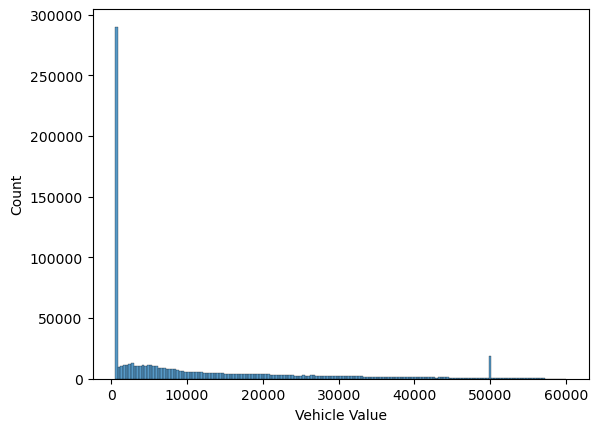

In [2]:
# Plot the distribution of a Vehicle Value 
sns.histplot(combined_df['Vehicle Value'])
plt.show()

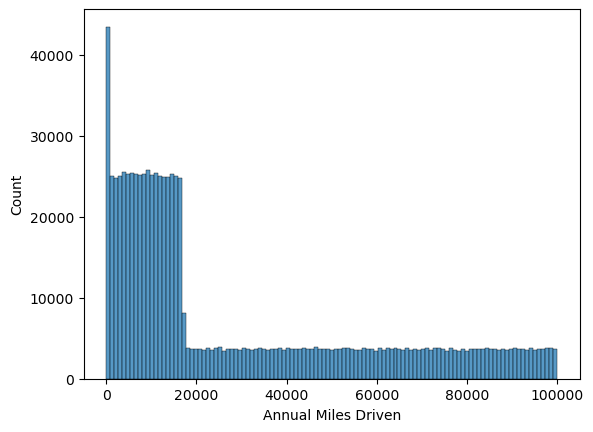

In [3]:
# Plot the distribution of a Annual Miles Driven
sns.histplot(combined_df['Annual Miles Driven'])
plt.show()

In [4]:
# Missing Data
missing_values = combined_df.isnull().sum()
print(missing_values)

HH_ID                           0
CUST_ID                         0
CAR_ID                          0
Active HH                       0
HH Start Date                   0
Phone Number                    0
ZIP                             0
State_x                         0
Country                         0
Referral Source                 0
Date of Birth                   2
Marital Status                  2
Employment Type                 2
Income                          2
Unnamed: 5                 845807
Unnamed: 6                 845807
Unnamed: 7                 845807
Unnamed: 8                 845807
Unnamed: 9                 845807
Unnamed: 10                845807
Unnamed: 11                845807
Unnamed: 12                845807
Unnamed: 13                845807
Unnamed: 14                845807
Unnamed: 15                845807
Unnamed: 16                845807
Unnamed: 17                845807
Unnamed: 18                845807
Unnamed: 19                845807
Status        